<a href="https://www.kaggle.com/code/mohadesehemamipour/titanic?scriptVersionId=259991021" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt


In [3]:
train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.shape

(891, 12)

In [5]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [7]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [8]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

train_df=train_data
test_df=test_data

# Explore the data
print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)
print("\nTrain Data Info:")
print(train_df.info())
print("\nMissing Values in Train Data:")
print(train_df.isnull().sum())

Train Data Shape: (891, 12)
Test Data Shape: (418, 11)

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values in Train Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Pa

In [10]:
def preprocess_data(df):
    # Create a copy to avoid modifying original data
    df_processed = df.copy()
    
    # Extract title from Name
    df_processed['Title'] = df_processed['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # Group rare titles
    title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Dr': 5, 'Rev': 5, 
                    'Col': 5, 'Major': 5, 'Mlle': 2, 'Countess': 5, 'Ms': 2, 
                    'Lady': 5, 'Jonkheer': 5, 'Don': 5, 'Dona': 5, 'Mme': 3, 'Capt': 5, 'Sir': 5}
    df_processed['Title'] = df_processed['Title'].map(title_mapping)
    df_processed['Title'].fillna(0, inplace=True)
    
    # Fill missing Age with median based on Title and Pclass
    df_processed['Age'] = df_processed.groupby(['Title', 'Pclass'])['Age'].transform(
        lambda x: x.fillna(x.median()))
    
    # Fill missing Embarked with mode
    df_processed['Embarked'].fillna(df_processed['Embarked'].mode()[0], inplace=True)
    
    # Fill missing Fare with median based on Pclass
    df_processed['Fare'] = df_processed.groupby('Pclass')['Fare'].transform(
        lambda x: x.fillna(x.median()))
    
    # Create FamilySize feature
    df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1
    
    # Create IsAlone feature
    df_processed['IsAlone'] = 1
    df_processed.loc[df_processed['FamilySize'] > 1, 'IsAlone'] = 0
    
    # Create Age categories
    df_processed['AgeCategory'] = pd.cut(df_processed['Age'], 
                                       bins=[0, 12, 18, 35, 60, 100], 
                                       labels=[1, 2, 3, 4, 5])
    
    # Create Fare categories
    df_processed['FareCategory'] = pd.qcut(df_processed['Fare'], 4, labels=[1, 2, 3, 4])
    
    # Convert categorical variables to numerical
    df_processed['Sex'] = df_processed['Sex'].map({'male': 0, 'female': 1})
    df_processed['Embarked'] = df_processed['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    
    # Drop unnecessary columns
    columns_to_drop = ['Name', 'Ticket', 'Cabin', 'Age', 'Fare']
    df_processed.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')
    
    return df_processed

# Preprocess both train and test data
train_processed = preprocess_data(train_df)
test_processed = preprocess_data(test_df)

In [11]:
# Prepare features and target
X = train_processed.drop(['Survived', 'PassengerId'], axis=1)
y = train_processed['Survived']

# Split the data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
model.fit(X_train, y_train)

# Make predictions on validation set
val_predictions = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.4f}")

Validation Accuracy: 0.8212


Feature Importance:
        feature  importance
5         Title    0.312176
1           Sex    0.274180
0        Pclass    0.142125
6    FamilySize    0.076263
9  FareCategory    0.059454
8   AgeCategory    0.048305
2         SibSp    0.038444
4      Embarked    0.023611
3         Parch    0.016677
7       IsAlone    0.008765


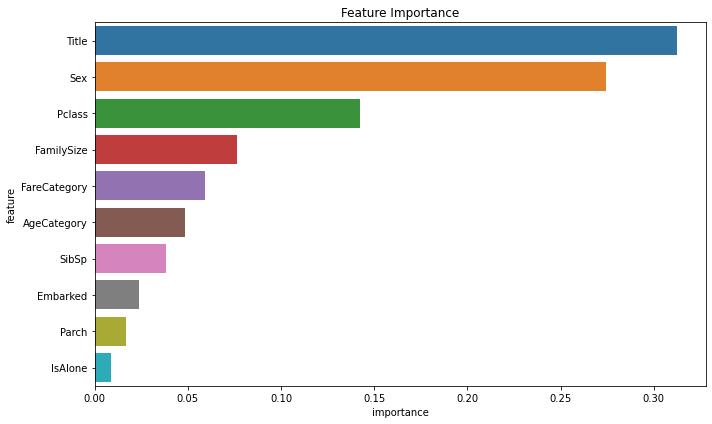

In [12]:
# Check feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [13]:
# Prepare test data (ensure same columns as training data)
test_features = test_processed.drop('PassengerId', axis=1)

# Align columns (in case any features are missing)
missing_cols = set(X.columns) - set(test_features.columns)
for col in missing_cols:
    test_features[col] = 0
test_features = test_features[X.columns]

# Make final predictions
test_predictions = model.predict(test_features)

# Create submission file
submission = pd.DataFrame({
    'PassengerId': test_processed['PassengerId'],
    'Survived': test_predictions
})

# Save submission file
submission.to_csv('titanic_submission.csv', index=False)
print("Submission file created: titanic_submission.csv")

Submission file created: titanic_submission.csv
